In [2]:
!pip install --upgrade langchain openai -q
!pip install unstructured -q
!pip install unstructured[local-inference] -q
!pip install detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.6#egg=detectron2 -q
!apt-get install poppler-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.6/990.6 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.9/379.9 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 32.8 MB/s eta 0:00:00

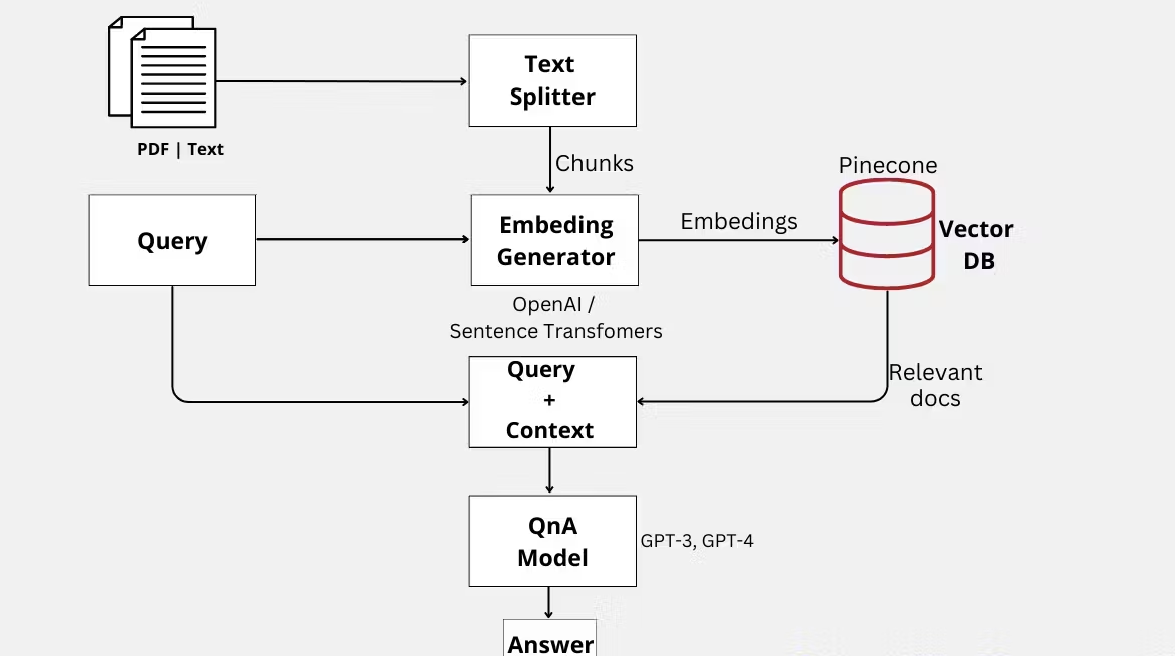

In [56]:
# Project Diagram Flowchart

from IPython.display import Image

# Replace 'path/to/your/image.jpg' with the actual path to your image
image_path = '/content/sample_data/Docs/Flowchart_For _Project.png'

display(Image(filename=image_path))


In [6]:
import os
import openai
import pinecone
from langchain.document_loaders import DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain


In [3]:
!pip install pinecone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.6/117.6 kB 10.4 MB/s eta 0:00:00


In [4]:
!pip install python-dotenv

In [5]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.8 MB/s eta 0:00:00


In [9]:
directory = '/content/sample_data/Docs'
def load_docs(directory):
  loader = DirectoryLoader(directory)
  documents = loader.load()
  return documents

documents = load_docs(directory)
len(documents)


10

In [10]:
def split_docs(documents, chunk_size=1000, chunk_overlap=20):
  text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
  docs = text_splitter.split_documents(documents)
  return docs

docs = split_docs(documents)
print(len(docs))

37


In [11]:
print(docs[0].page_content)

CompuTech Laptop FAQ

1. Product Overview CompuTech offers a range of laptops to meet diverse computing needs. Our current lineup includes:

CT-B500 (Business)

CT-G700 (Gaming)

CT-U300 (Ultralight)

Each model is engineered with high-performance components and innovative features to enhance user experience.

2. Technical Specifications

CT-B500 (Business) Processor: Intel i7

Memory: 16GB RAM

Storage: 512GB SSD

Display: 15.6-inch Full HD

Graphics: NVIDIA GTX 1650

Battery Capacity: 6000mAh

CT-G700 (Gaming) Processor: Intel i7

Memory: 16GB RAM

Storage: 512GB SSD

Display: 15.6-inch Full HD

Graphics: NVIDIA GTX 1650

Battery Capacity: 6000mAh

CT-U300 (Ultralight) Processor: Intel i7

Memory: 16GB RAM

Storage: 512GB SSD

Display: 15.6-inch Full HD

Graphics: NVIDIA GTX 1650

Battery Capacity: 6000mAh

3. Key Features • High-Performance Processor: Ensures smooth and fast computing experience for all tasks.

Advanced Graphics: Provides stunning visuals for gaming and multimedia.


In [12]:
!pip install tiktoken -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.6 MB/s eta 0:00:00


In [25]:
from google.colab import userdata
userdata.get('OPENAI_API_KEY')

'sk-proj-R2mJn1GFDeYOdL5kd2wrT3BlbkFJu6Gt8zyu7NGDC9LCAwDq'

In [26]:
import os
os.environ['OPENAI_API_KEY'] =  userdata.get('OPENAI_API_KEY')

In [27]:
import openai
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')

query_result = embeddings.embed_query("Hello world")
len(query_result)

1536

In [28]:
pip install pinecone-client


In [29]:
from pinecone import Pinecone

pc = Pinecone(api_key="d8a9c1cc-65f1-4f0a-b45a-f1bc398ac56a")
index = pc.Index("intelligentdocprocessor")

In [34]:
!pip install langchain-pinecone -q

In [39]:
    import os
    from langchain_pinecone import PineconeVectorStore

    os.environ['PINECONE_API_KEY'] = 'd8a9c1cc-65f1-4f0a-b45a-f1bc398ac56a'

    index_name = "intelligentdocprocessor"

    vectorstore = PineconeVectorStore(index_name=index_name, embedding=embeddings)


In [40]:
# prompt: Write a code to store this embedding in pincone

vectorstore = Pinecone.from_documents(docs, embeddings, index_name=index_name)


In [47]:
def get_similiar_docs(query, k=2, score=False):
  if score:
    similar_docs = vectorstore.similarity_search_with_score(query, k=k)
  else:
    similar_docs = vectorstore.similarity_search(query, k=k)
  return similar_docs


In [55]:

from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain

llm = OpenAI(temperature=0)
chain = load_qa_chain(llm, chain_type="stuff")

def get_answer(query):
  similar_docs = get_similiar_docs(query)
  answer = chain.run(input_documents=similar_docs, question=query)
  return answer

query = "What is the warranty on Photo Pro_Digital_Camera?"
answer = get_answer(query)
print(answer)


 The warranty for PhotoPro digital cameras is 2 years from the date of purchase and covers free repair and replacement for manufacturing defects. However, it excludes damage caused by misuse or unauthorized modifications.
